# glimy
   Glimy is the state-of-art, open source computational electromagnetics simulator. It provides ubiqious access to advanced electromagnetic simulations with an easy manner. Everybody with good intuition of geomtetry and able to program python can adapt glimy quickly. Glimy reduces difficult electromagnetics problems into a simple geometry problem. You just need to arrange some rectangles, prisms etc. Rest of the hardness is handled by FDTD based backend.
## Capabilities
- Electromagnetic wave simulations in any frequency
- Gravitational effect on the electromagnetism. 
- 2D and 3D
- Rectangle, Circle, Rectangular Prism, Sphere, Cylinder support
- Point clouds are able to be integrated. It provides any shape to be represented in electromagnetic grid
- Dielectric and magnetic material support
- Anisotropic material support
- Easy interface and rich visualization tools
- Easily scalable geometric structure
- Fast backend
- Optimized geometry preprocessor
### Install Latest Edition

In [1]:
!pip install --upgrade glimy

In [2]:
import glimy

Interacting with reality...


After the installation if you get the preamble **Interacting with reality...**, installation is successful. 
Next, lets learn how to use glimy
## Tree
  Tree of the module is shown below. It seems complex in first place. But it is well organized and like an efficient language, it is inherently well organized; learning few provide you to estimate others. Anyway, just overlook the tree, we will explore it.
  
<pre>
|----Continuum(object)----|
|                         |---__init__(grid_size,ds)
|                         |---add(arg)
|                         |---export_grid()
|                         |---export_field()
|                         |---build(verbose=1)
|                         |---impose_grid(e,mu,anisotropy=(False,False))
|                         |---view_metric(field="t",*args,colorbar=True)
|                         |---view_structure(field="e",*args,colorbar=True)
|                         |---view_field(field="E",*args,colorbar=True)
|                         |---Render(time_steps,backend="numpy",observers=None)
|
|
|----DotSource(object)----|
|                         |---__init__(location,presence,amplitude,frequency,phase=0)
|                         |---__repr__()
|
|
| 
|----geo(module)--------|
                        |----SingularCelestial(object)----|
                        |                                 |---__init__(location,mass)
                        |                                 |---__repr__()
                        |
                        |
                        |----MassiveCluster(object)-------|
                        |                                 |---__init__(objects,volatile=False)
                        |                                 |---add(arg)
                        |                                 |---__repr__()
                        |
                        |
                        |----PointCloud(object)-----------|
                        |                                 |---__init__(points,layer=0,e=1,mu=1,time=None)
                        |                                 |---layer()
                        |                                 |---__repr__()
                        |
                        |
                        |----Rectangle(PointCloud)--------|
                        |                                 |---__init__(A,B,layer=0,e=1,mu=1,time=None)
                        |
                        |
                        |----RectPrism(PointCloud)--------|
                        |                                 |---__init__(A,B,layer=0,e=1,mu=1,time=None)
                        |
                        |
                        |----Circle(object)---------------|
                        |                                 |---__init__(A,r,layer=0,e=1,mu=1,time=None)
                        |                                 |---__repr__()
                        |
                        |
                        |----Sphere(object)---------------|
                        |                                 |---__init__(A,r,layer=0,e=1,mu=1,time=None)
                        |                                 |---__repr__()
                        |
                        |
                        |----Cylinder(object)-------------|
                                                          |---__init__(A,r,h,layer=0,e=1,mu=1,time=None)
                                                          |---__repr__()
</pre>

The modular structure of the glimy allows for flexible and efficient simulations by breaking down the simulation process into manageable components. In this part, we will explore the main components of the glimy and their role in the simulation process.

### Continuum(object)

The Continuum class is the backbone of the simulation process. It serves as the container for all the sources and structures in the simulation space. When creating an instance of the Continuum class, you need to specify the grid size and the grid interval (ds). The grid size represents the number of grid points in the x and y dimensions, while the grid interval determines the distance between consecutive grid points. Grid interval is given in meters

In [3]:
# 2D
grid_size_2D = (512, 512)
ds = 0.01#m = 1cm
grid2D = glimy.Continuum(grid_size_2D, ds)

# 3D
grid_size_3D = (256,256,256)
ds = 0.01#m = 1cm
grid3D = glimy.Continuum(grid_size_3D, ds)

### glimy.DotSource(object)

The DotSource is used to represent a point source that generates a polarized wave in the Z direction. This class is used to specify the source of the wave in a simulation.

The DotSource class has several parameters that define its properties:

 - location: A tuple representing the (x,y) or (x,y,z) location of the source(in grid units).
 - presence: A 2-tuple/list represents (start, stop) instances. The unit is simulation step in which duration of each step(dt) is given by $$dt=\frac{ds}{c\sqrt{\text{# of dimensions}}}$$where $ds$ is spatial grid interval
 - amplitude: The amplitude of the wave generated by the source.(Arb-units)
 - frequency: The frequency of the wave generated by the source.(Hz)
 - phase: The phase of the wave generated by the source (defaults to 0).

You can use the DotSource class to define the source of the light in your simulation.

In [4]:
energizer2D = glimy.DotSource((10,20),(0,1000),1, 2.4e8)#0.24 GHz

energizer3D = glimy.DotSource((10,20,100),(0,1000),1, 2.4e8)#0.24 GHz

#### Adding Sources into Continuum
Once you have created an instance of the Continuum class, you can add sources and structures as well as list/tuple/set of them into the simulation space using the <code>Continuum(...).add</code> method.


In [5]:
grid2D.add(energizer2D)

#### Build after Adding Assets
Some assets might need extensive computational resource. Therefore after adding everything, <code>Continuum(...).build()</code> is called and the reality is constructed before the simulation

In [6]:
grid2D.build()

Built in 237ms  1.101 MPoints/s



### Continuum(...).Render()
The Render method is used to visualize the electromagnetic field generated by a simulation. It takes two arguments:

- time_steps: The number of time steps to simulate and visualize.
- backend: The backend to use for visualization. for now, only "numpy" is available.
- observers: An optional list of observer objects to be used for monitoring the simulation.

The Render function generates the electromagnetic field for the specified number of time steps and visualizes it using either the numpy or matplotlib backends. The resulting visualization can be used to inspect the behavior of the field over time and analyze the results of the simulation.

It is important to note that the Render function must be called after the build method of the Continuum object, which sets up the simulation and calculates the initial electromagnetic field. The Render function then uses this information to generate the visualization.

A sentimental progress bar displays the progress, ETA and iteration number

In [7]:
grid2D.Render(3000)

[=================================================B)-] 99% - ETA:209ms - 2990/3000------------------
Rendered Succesfully
Elapsed Time :  1m  9s 762ms , 0.023254135688145956 s/step
Render Stream Rate : 11.273 MPoints/s


### view_field()
It is time to see rendered electromagnetic field

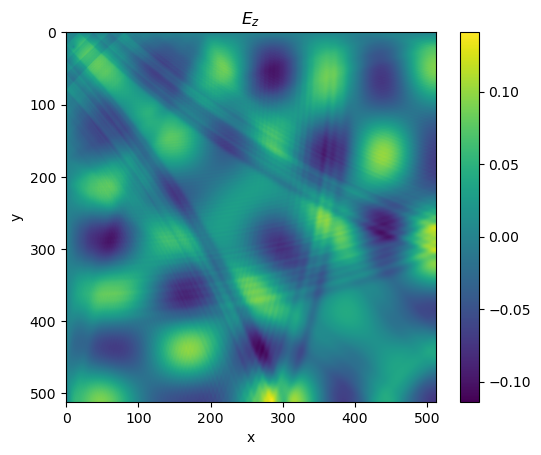

In [8]:
grid2D.view_field("E")